<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Дмитрий! Меня зовут Григорий Звездин, и я буду проверять этот проект. Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>

<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


---

<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='blue'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<div class="alert alert-block alert-info"><b>Предисловие:</b> 
<p>Привет</p>
<p>т.к. в Я.Практикуме последнюю тему решили нориально не давать, я Х.З., что тут нужно делать и как правильно, будем разбираться вместе))</p>


<div class="alert alert-block alert-info"><b>Теперь вопрос правильно я преобразование сделал из картинки в вектор или нет:</b> 
<p>Загрузчик я сделал, но сильно сомневаюсь, что правльно связал имена картинок и их вектор</p>
<p>И модель теперь вообще не понимает что я ей показываю=)))</p>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Хорошо, вперед :)

# Прекод

# Сборный проект-4

Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

### Описание данных

Данные лежат в папке `/datasets/image_search/`.

В файле `train_dataset.csv` находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

## 1. Исследовательский анализ данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке: 

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке. 
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

После анализа экспертных и краудсорсинговых оценок выберите либо одну из них, либо объедините их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Ваша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Когда прогонял у себя, добавлял:
```
! pip install gensim -U
! curl https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip --output data.zip
! unzip -o -q /content/data.zip
! mv to_upload source
```

Только в последних версия gensim есть vector_size, до этого был просто size\
А загрузка позволяет вручную в колаб не подгружать данные

In [1]:
# То что читал попутно
# https://thinkingneuron.com/how-to-classify-text-using-word2vec/
# https://builtin.com/machine-learning/nlp-word2vec-python
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import re

import nltk

from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

english_stopwords = set(nltk_stopwords.words('english'))
null_stopwords = []
vect = CountVectorizer()
tf_vect = TfidfVectorizer()

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dmitry/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/dmitry/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/dmitry/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/dmitry/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Круто, что указываешь, какие материалы изучал в процессе. Такие комментарии полезны\
    А вот комменты с неиспользуемым кодом лучше убрать

In [2]:
from gensim.models import Word2Vec
import numpy as np

# https://russianblogs.com/article/37751553118/
# https://medium.com/@nina95dan/simple-image-classification-with-resnet-50-334366e7311a
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

import sklearn.linear_model as lm
from sklearn.model_selection import GroupShuffleSplit

In [3]:
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AveragePooling2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

2022-09-13 19:42:09.970776: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Читаем данные именуем столбцы
df_t = pd.read_csv('source/train_dataset.csv')
df_c = pd.read_csv('source/CrowdAnnotations.tsv', sep='\t', names=['image', 'query_id', 'proc', 't', 'f'])
df_e = pd.read_csv('source/ExpertAnnotations.tsv', sep='\t', names=['image', 'query_id', 'e1', 'e2', 'e3'])

In [5]:
display('Датасет для тернировки')
display(df_t.head(5))
display(df_t.info())
display('Датасет оценок краудсорсинга')
display(df_c.head(5))
display(df_c.info())
display('Датасет оценок экспертов')
display(df_e.head(5))
display(df_e.info())

'Датасет для тернировки'

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


None

'Датасет оценок краудсорсинга'

,image,query_id,proc,t,f
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image     47830 non-null  object 
 1   query_id  47830 non-null  object 
 2   proc      47830 non-null  float64
 3   t         47830 non-null  int64  
 4   f         47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


None

'Датасет оценок экспертов'

,image,query_id,e1,e2,e3
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   e1        5822 non-null   int64 
 3   e2        5822 non-null   int64 
 4   e3        5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.5+ KB


None

__Вывод:__ Из выше представленных данных видно, что типы данных определились верно, пустые строки отсутствуют.

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>Добавь, пожалуйста, изучение данных, хотя бы посмотреть первые строки и инфо

<div class="alert alert-block alert-info"><b>Комментарий студента V1:</b> 
<p>Добавил.</p></div>

In [6]:
# Функция покажет количество уникальных оценок в датасете
def len_list_in_col(row:pd.Series)->int:
    result = len(set(row))
    return result
# Возьмём предложенный метод
df_e['el'] = df_e[['e1', 'e2', 'e3']].values.tolist()
df_e['el'] = df_e['el'].apply(len_list_in_col)
df_e = df_e[df_e['el']!=3].copy()
df_e['em'] = df_e[['e1', 'e2', 'e3']].mode(axis=1)[0]
# Ну всё оценки экспертов лежат в столбце em
df_e

,image,query_id,e1,e2,e3,el,em
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,2,1
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2,2,1
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2,2,1
...,...,...,...,...,...,...,...
5817,997722733_0cb5439472.jpg,2981702521_2459f2c1c4.jpg#2,1,1,1,1,1
5818,997722733_0cb5439472.jpg,2985679744_75a7102aab.jpg#2,1,1,1,1,1
5819,997722733_0cb5439472.jpg,3150742439_b8a352e1e0.jpg#2,1,1,2,2,1
5820,997722733_0cb5439472.jpg,3375070563_3c290a7991.jpg#2,1,1,1,1,1


In [7]:
# т.к. думать лень рашим в лоб, преобразуем оценки людей в эквивалент экспертных
converter_crowd_to_expert = {
    '[3, 0]':4,
    '[2, 1]':3,
    '[1, 2]':2,
    '[0, 3]':1
}

def crowd_to_exp(row:pd.Series, conv)->int:
    result = conv.get(str(row), None)
    return result
df_c['em'] = df_c[['t', 'f']].values.tolist()
df_c['em'] = df_c['em'].apply(crowd_to_exp,  **{'conv':converter_crowd_to_expert})

In [8]:
# Объеденим оценки экспертов и еще какието в один столбец
df_m = pd.merge(df_e, df_c, how='inner', on=['image','query_id'])
df_m['em_a'] = df_m['em_x'] * .6 + df_m['em_y'] * .4

In [9]:
# Преобразую всё что могу к значениям 0, 1
df_m['scaler_em_a'] = minmax_scale(df_m['em_a'], feature_range=(0, 1))
df_m['scaler_em_x'] = minmax_scale(df_m['em_x'], feature_range=(0, 1))
df_m['scaler_em_y'] = minmax_scale(df_m['em_y'], feature_range=(0, 1))

In [10]:
df_m

,image,query_id,e1,e2,e3,el,em_x,proc,t,f,em_y,em_a,scaler_em_a,scaler_em_x,scaler_em_y
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,1,1,0.000000,0,3,1.0,1.0,0.000000,0.000000,0.000000
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,2,1,0.000000,0,3,1.0,1.0,0.000000,0.000000,0.000000
2,1056338697_4f7d7ce270.jpg,434792818_56375e203f.jpg#2,1,1,2,2,1,0.000000,0,3,1.0,1.0,0.000000,0.000000,0.000000
3,1084040636_97d9633581.jpg,256085101_2c2617c5d0.jpg#2,2,3,3,2,3,0.333333,1,2,2.0,2.6,0.533333,0.666667,0.333333
4,1084040636_97d9633581.jpg,3396157719_6807d52a81.jpg#2,1,2,2,2,2,0.000000,0,3,1.0,1.6,0.200000,0.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,979383193_0a542a059d.jpg,3244747165_17028936e0.jpg#2,2,2,2,1,2,0.000000,0,3,1.0,1.6,0.200000,0.333333,0.000000
2254,979383193_0a542a059d.jpg,3482062809_3b694322c4.jpg#2,1,2,2,2,2,0.000000,0,3,1.0,1.6,0.200000,0.333333,0.000000
2255,997722733_0cb5439472.jpg,2985679744_75a7102aab.jpg#2,1,1,1,1,1,0.000000,0,3,1.0,1.0,0.000000,0.000000,0.000000
2256,997722733_0cb5439472.jpg,3150742439_b8a352e1e0.jpg#2,1,1,2,2,1,0.000000,0,3,1.0,1.0,0.000000,0.000000,0.000000


## 2. Проверка данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

> This image is unavailable in your country in compliance with local laws
> 

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

In [11]:
# Мои стоп слова
my_stop = ['boy', 'child', 'girl', 'baby', 'todler', 'kid']
# Лемматизация с моими стоп словами нужна для маркировки стоп лов знаком 16+
def get_lemm_word(sentence:str, stop_words:list, stop_words_my:list)->str:
    lemm_word_list = []
    sentence = re.sub(r'[^\w\s]', '', sentence).lower()
    word_list = nltk.word_tokenize(sentence)
    for word in word_list:
        lemm_word = lemmatizer.lemmatize(word)
        lemm_word_list.append(lemm_word)
    lemm_word_list = set(lemm_word_list) - set(stop_words)
    result = ' '.join(list(lemm_word_list))
    for word in stop_words_my:
        if word in result:
            result = '16+'
            break
    return result

# Основной лемматизатор
def lemmer(sentence:str, stop_words:list)->str:
    lemm_word_list = []
    word_list = nltk.word_tokenize(sentence)
    for word in word_list:
        lemm_word = lemmatizer.lemmatize(word.lower())
        in_stop_words=False
        for m in stop_words:
            if m == lemm_word:
                in_stop_words = True
                break
        if in_stop_words == False:
            lemm_word_list.append(lemm_word)
    result = ' '.join(list(lemm_word_list))
    return result

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Хорошо, и слова выбраны верно. Можно добавить в список baby, todler, kid

In [12]:
df_t['lemm'] = df_t['query_text'].apply(get_lemm_word, **{'stop_words':english_stopwords,
                                                         'stop_words_my':my_stop})

df_t['query_clean'] = df_t['query_text'].str.replace(r'[^\w\s]', '').str.lower()

df_t['query_clean_lemm'] = df_t['query_clean'].apply(lemmer, **{'stop_words':english_stopwords})

/var/folders/5m/zj2yj9bd5m55jbrzd0_nfd6m0000gn/T/ipykernel_7142/1613038779.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_t['query_clean'] = df_t['query_text'].str.replace(r'[^\w\s]', '').str.lower()


In [13]:
df_t

,image,query_id,query_text,lemm,query_clean,query_clean_lemm
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,16+,a young child is wearing blue goggles and sitt...,young child wearing blue goggles sitting float...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,16+,a young child is wearing blue goggles and sitt...,young child wearing blue goggles sitting float...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,16+,a young child is wearing blue goggles and sitt...,young child wearing blue goggles sitting float...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,16+,a young child is wearing blue goggles and sitt...,young child wearing blue goggles sitting float...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,16+,a young child is wearing blue goggles and sitt...,young child wearing blue goggles sitting float...
...,...,...,...,...,...,...
5817,757046028_ff5999f91b.jpg,2061144717_5b3a1864f0.jpg#2,A man in an ampitheater talking to a boy .,16+,a man in an ampitheater talking to a boy,man ampitheater talking boy
5818,799486353_f665d7b0f0.jpg,2196107384_361d73a170.jpg#2,a old man walks down the uncrowded road .,road old walk uncrowded man,a old man walks down the uncrowded road,old man walk uncrowded road
5819,909808296_23c427022d.jpg,2112921744_92bf706805.jpg#2,A dog stands on the side of a grassy cliff .,grassy dog stand cliff side,a dog stands on the side of a grassy cliff,dog stand side grassy cliff
5820,929679367_ff8c7df2ee.jpg,3651971126_309e6a5e22.jpg#2,A blurry photo of two dogs .,dog two photo blurry,a blurry photo of two dogs,blurry photo two dog


## 3. Векторизация изображений

Перейдём к векторизации изображений.

Самый примитивный способ — прочесть изображение и превратить полученную матрицу в вектор. Такой способ нам не подходит: длина векторов может быть сильно разной, так как размеры изображений разные. Поэтому стоит обратиться к свёрточным сетям: они позволяют "выделить" главные компоненты изображений. Как это сделать? Нужно выбрать какую-либо архитектуру, например ResNet-18, посмотреть на слои и исключить полносвязные слои, которые отвечают за конечное предсказание. При этом можно загрузить модель данной архитектуры, предварительно натренированную на датасете ImageNet.

In [14]:
# https://russianblogs.com/article/37751553118/
paths = Path('source/train_images').rglob('*.jpg')
paths_img_for_test = Path('source/test_images').rglob('*.jpg')
# Получим в список пути картинок
jpg_paths = list(map(str, paths))
jpg_paths_img_for_test = list(map(str, paths_img_for_test))


In [15]:
# Получаем картинки в вектор
def img_to_vec_2(img_path:str, w, h):
    im_name = img_path.split('/')[-1]
    wh = width_img
    ht = height_img
    m = np.array(Image.open(path).convert('RGB').resize((wh,ht)))
    return im_name, m.reshape(1,wh,ht,3)

# Та функция которая по идее получает вектора изображений но по какойто причине они почти все одинаковые
vector_len_for_img_and_text = 600
def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape, weights='imagenet', include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(Dense(vector_len_for_img_and_text, activation='relu'))
    return model

def create_model_2(input_shape):
    backbone = ResNet50(input_shape=input_shape, weights='imagenet', include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(Flatten())
    model.add(Dense(vector_len_for_img_and_text, activation='relu'))
    return model

In [16]:
'''width_img = height_img = 224
img_vec = dict()
model = create_model((width_img, height_img, 3))
for path in jpg_paths:
    n, v = img_to_vec_2(path, width_img, height_img)
    r50_v = model(v)
    img_vec[n] = r50_v.numpy()[0]
print('Part test')
img_vec_2 = dict()
for path in jpg_paths_img_for_test:
    n, v = img_to_vec_2(path, width_img, height_img)
    r50_v = model(v)
    img_vec_2[n] = r50_v.numpy()[0]'''

"width_img = height_img = 224\nimg_vec = dict()\nmodel = create_model((width_img, height_img, 3))\nfor path in jpg_paths:\n    n, v = img_to_vec_2(path, width_img, height_img)\n    r50_v = model(v)\n    img_vec[n] = r50_v.numpy()[0]\nprint('Part test')\nimg_vec_2 = dict()\nfor path in jpg_paths_img_for_test:\n    n, v = img_to_vec_2(path, width_img, height_img)\n    r50_v = model(v)\n    img_vec_2[n] = r50_v.numpy()[0]"

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>
    Имеет смысл воспользоваться загрузчиком из темы Компьютерное зрение в Keras - Загрузчики данных\
    У тебя есть полносвязные слои, а нам нужна свертка (верхушка не нужна). Параметр include_top=False убирает верхушку самого реснета, значит, тебе нужно убрать все, кроме backbone, и будет отлично (тема ResNet в Keras [GPU] про параметры модели)
    

<div class="alert alert-block alert-info"><b>Загрузчик V1:</b> 
<p>Создал загрузчик, читает данные из нужной папки.</p>
<p>Связывает имена через datagen_train.filenames.</p>

In [17]:
# https://practicum.yandex.ru/learn/data-scientist-plus/courses/1770e0c9-1225-4554-b336-96c1fc166bc0/sprints/6563/topics/a8313445-b2d5-40a1-8c78-4cf33bcbb227/lessons/b827be1d-cd01-4461-8f9c-ff12e7f36545/
width_img = height_img = 224
datagen = ImageDataGenerator() 

datagen_train = datagen.flow_from_directory(
    # папка, в которой хранится датасет
    'source',
    # папка из которой берем картики и присваиваем ей класс
    classes=['train_images'],
    # к какому размеру приводить изображения
    target_size=(width_img, height_img), 
    # размер батча
    batch_size=99999999999999999999999999999999999,
    # в каком виде выдавать метки классов
    class_mode=None,
    # фиксируем генератор случайных чисел (от англ. random seed)
    seed=12345)

datagen_test = datagen.flow_from_directory(
    # папка, в которой хранится датасет
    'source',
    # папка из которой берем картики и присваиваем ей класс
    classes=['test_images'],
    # к какому размеру приводить изображения
    target_size=(width_img, height_img), 
    # размер батча
    batch_size=99999999999999999999999999999999999,
    # в каком виде выдавать метки классов
    class_mode=None,
    # фиксируем генератор случайных чисел (от англ. random seed)
    seed=12345)
# Посомтрим какие классы у нас есть в датаген
#datagen_train.class_indices
file_names_train = [f.split('/')[-1] for f in datagen_train.filenames]
file_names_test = [f.split('/')[-1] for f in datagen_test.filenames]

features_train = next(datagen_train)
features_test = next(datagen_test)

model_2 = create_model_2((width_img, height_img, 3))

Found 1000 images belonging to 1 classes.
Found 100 images belonging to 1 classes.


2022-09-13 19:42:21.635372: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
keras_vec_train = model_2(features_train).numpy()
keras_vec_test = model_2(features_test).numpy()

<div class="alert alert-block alert-info"><b>Возможно ошибка V1:</b> 
<p>Вот не факт что я через zip верно связал вектора и имена файлов возможно есть более верный метод

In [19]:
img_vec_3 = dict(zip(file_names_train,keras_vec_train))
img_vec_4 = dict(zip(file_names_test,keras_vec_test))

## 4. Векторизация текстов

Следующий этап — векторизация текстов. Вы можете поэкспериментировать с несколькими способами векторизации текстов:

- tf-idf
- word2vec
- \*трансформеры (например Bert)

\* — если вы изучали трансформеры в спринте Машинное обучение для текстов.


In [20]:
df_clean = df_t[df_t['lemm']!='16+'][['image', 'query_id', 'query_clean_lemm']].copy()
features_train_tfidf = tf_vect.fit_transform(df_clean['query_clean_lemm'])

In [21]:
word2vec = Word2Vec(df_clean['query_clean_lemm'].str.split(' '), min_count=1, vector_size=vector_len_for_img_and_text)
def row_to_vec(words):
    result = word2vec.wv[words.split(' ')].mean(axis=0)
    return result
features_train_word2vec = df_clean['query_clean_lemm'].apply(row_to_vec)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Хорошо

## 5. Объединение векторов

Подготовьте данные для обучения: объедините векторы изображений и векторы текстов с целевой переменной.

In [22]:
df_clean['vec_img'] = df_clean['image'].map(img_vec_3)
df_clean['word2vec'] = features_train_word2vec
df_clean.reset_index(inplace=True, drop=True)
df_clean['tf_idf'] = pd.Series(features_train_tfidf.toarray().tolist())

In [23]:
# Ну будем думать, что угадал, но задача странная на объеденение векторов или я что-то не так понял
df_union = pd.merge(df_m[['image', 'query_id', 'scaler_em_a']], 
                    df_clean[['image', 'query_id', 'vec_img', 'word2vec', 'tf_idf']], 
                    how='inner', on=['image','query_id'])

In [24]:
df = df_union[['query_id', 'scaler_em_a', 'vec_img', 'word2vec', 'tf_idf']].copy()

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>А почему угадайка? Все верно, есть два df - один с векторами, другой с оценкой, делаешь merge inner по image и query_id

## 6. Обучение модели предсказания соответствия

Для обучения разделите датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки.
Для того чтобы учесть изображения при разбиении, можно воспользоваться классом [GroupShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html) из библиотеки sklearn.model_selection.

Код ниже разбивает датасет на тренировочную и тестовую выборки в пропорции 7:3 так, что строки с одинаковым значением 'group_column' будут содержаться либо в тестовом, либо в тренировочном датасете.

```
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, test_indices = next(gss.split(X=df.drop(columns=['target']), y=df['target'], groups=df['group_column']))
train_df, test_df = df.loc[train_indices], df.loc[test_indices]

```

Какую модель использовать — выберите самостоятельно. Также вам предстоит выбрать метрику качества либо реализовать свою.

In [25]:
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, test_indices = next(gss.split(X=df.drop(columns=['scaler_em_a']), y=df['scaler_em_a'], groups=df['query_id']))
train_df, test_df = df.loc[train_indices], df.loc[test_indices]

#min_vector_len_for_resize = min(train_df['vec_img'][0].shape[0], train_df['word2vec'][0].shape[0])
y_train = np.array(train_df['vec_img'].to_list())
x_train = np.array(train_df['word2vec'].to_list())

y_test = np.array(test_df['vec_img'].to_list())
x_test = np.array(test_df['word2vec'].to_list())

In [26]:
 def create_model_for_predict_vector_2(input_len, output_len):
    m=Sequential()
    m.add(Dense(units=output_len,input_dim=input_len))
    #m.add(Dense(units=output_len))
    m.compile(optimizer='adam',loss='huber_loss')
    return m

def create_model_for_predict_vector_3(input_len, output_len):
    m=Sequential()
    m.add(Dense(units=1000,input_dim=input_len))
    m.add(Dense(10, activation='relu'))
    m.add(Dense(20, activation='relu'))
    #m.add(Dropout(.1))
    m.add(Dense(output_len, activation='relu'))
    m.compile(optimizer='adam',loss='huber_loss')
    return m
def create_model_for_predict_vector_4(input_len, output_len):
    m=Sequential()
    m.add(Dense(units=1000,input_dim=input_len))
    m.add(Dense(700, activation='relu'))
    m.add(Dense(600, activation='relu'))
    m.add(Dropout(.5))
    m.add(Dense(500, activation='relu'))
    m.add(Dense(output_len, activation='relu'))
    m.compile(optimizer='adam',loss='huber_loss')
    return m
x_len = x_train[0].shape[0]
y_len = y_train[0].shape[0]
#model2 = create_model_for_predict_vector_2(x_len, y_len)
model3 = create_model_for_predict_vector_3(x_len, y_len)
#model4 = create_model_for_predict_vector_4(x_len, y_len)

In [27]:
#model2.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=5, epochs=100)
model3.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=10, epochs=100)
#model4.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=100, epochs=400)

Epoch 1/100
125/125 [==============================] - 1s 5ms/step - loss: 0.7938 - val_loss: 0.7804
Epoch 2/100
125/125 [==============================] - 0s 4ms/step - loss: 0.7785 - val_loss: 0.7792
Epoch 3/100
125/125 [==============================] - 0s 4ms/step - loss: 0.7783 - val_loss: 0.7788
Epoch 4/100
125/125 [==============================] - 0s 4ms/step - loss: 0.7781 - val_loss: 0.7784
Epoch 5/100
125/125 [==============================] - 1s 4ms/step - loss: 0.7774 - val_loss: 0.7783
Epoch 6/100
125/125 [==============================] - 1s 4ms/step - loss: 0.7765 - val_loss: 0.7763
Epoch 7/100
125/125 [==============================] - 0s 4ms/step - loss: 0.7758 - val_loss: 0.7759
Epoch 8/100
125/125 [==============================] - 0s 4ms/step - loss: 0.7754 - val_loss: 0.7760
Epoch 9/100
125/125 [==============================] - 0s 4ms/step - loss: 0.7754 - val_loss: 0.7753
Epoch 10/100
125/125 [==============================] - 0s 4ms/step - loss: 0.7751 - val_lo

125/125 [==============================] - 1s 6ms/step - loss: 0.7565 - val_loss: 0.7580
Epoch 82/100
125/125 [==============================] - 1s 5ms/step - loss: 0.7565 - val_loss: 0.7585
Epoch 83/100
125/125 [==============================] - 1s 6ms/step - loss: 0.7563 - val_loss: 0.7575
Epoch 84/100
125/125 [==============================] - 1s 6ms/step - loss: 0.7554 - val_loss: 0.7563
Epoch 85/100
125/125 [==============================] - 1s 6ms/step - loss: 0.7550 - val_loss: 0.7566
Epoch 86/100
125/125 [==============================] - 1s 5ms/step - loss: 0.7552 - val_loss: 0.7563
Epoch 87/100
125/125 [==============================] - 1s 6ms/step - loss: 0.7550 - val_loss: 0.7563
Epoch 88/100
125/125 [==============================] - 1s 6ms/step - loss: 0.7551 - val_loss: 0.7565
Epoch 89/100
125/125 [==============================] - 1s 6ms/step - loss: 0.7549 - val_loss: 0.7571
Epoch 90/100
125/125 [==============================] - 1s 6ms/step - loss: 0.7550 - val_loss: 

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Отлично

## 7. Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки `test_images`, выберите случайные 10 запросов из файла `test_queries.csv` и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.

In [28]:
# Если в словаре нет слова то меняем его на нулевой вектор)
def row_to_vec_2(words):
    result = np.array([np.ones(vector_len_for_img_and_text)])
    for word in words.split(' '):
        if word in word2vec.wv:
            result = np.append(result, [word2vec.wv.get_vector(word)], axis = 0)
        else:
            result = np.append(result,[np.zeros(vector_len_for_img_and_text)], axis = 0)
    result = result[1:].mean(axis=0)
    return result

In [29]:
df_tt = pd.read_csv('source/test_queries.csv', sep='|')
df_tt.drop('Unnamed: 0', axis=1, inplace=True)

df_tt['lemm'] = df_tt['query_text'].apply(get_lemm_word, **{'stop_words':english_stopwords,
                                                         'stop_words_my':my_stop})

df_tt['query_clean'] = df_tt['query_text'].str.replace(r'[^\w\s]', '').str.lower()

df_tt['query_clean_lemm'] = df_tt['query_clean'].apply(lemmer, **{'stop_words':english_stopwords})
df_tt['query_clean_lemm'] = df_tt['query_clean'].apply(lemmer, **{'stop_words':english_stopwords})
features_train_word2vec = df_tt['query_clean_lemm'].apply(row_to_vec_2)
df_tt['word2vec'] = features_train_word2vec

df_tt = df_tt[df_tt['lemm']!='16+'].copy()

/var/folders/5m/zj2yj9bd5m55jbrzd0_nfd6m0000gn/T/ipykernel_7142/2601542513.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tt['query_clean'] = df_tt['query_text'].str.replace(r'[^\w\s]', '').str.lower()


<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='orange'>Можно преобразования обернуть в функцию

In [30]:
df_tt['vec_img'] = df_tt['image'].map(img_vec_4)

In [31]:
list_for_test = list(df_tt.sample(10).index)
id_str_for_test = list_for_test[0]
#str_query_for_test = np.array([df_tt['word2vec'][id_str_for_test]])
#predict_img = model3.predict(str_query_for_test)

In [32]:
def get_distance_L2_vec(row, pred_img):
    result = np.linalg.norm(row - pred_img, ord=2)
    return result

def get_distance_mean_vec_img(row, pred_img):
    result = abs(row.sum() - pred_img.sum())
    return result

def test_get_predict(data, id_pred, mod):
    str_query_for_test = np.array([df_tt['word2vec'][id_pred]])
    predict_img = mod.predict(str_query_for_test)
    
    data['L2'] = df_tt['vec_img'].apply(get_distance_L2_vec, **{'pred_img':predict_img})
    data['sum_vec_img'] = data['vec_img'].apply(get_distance_mean_vec_img, **{'pred_img':predict_img})

    name = df_tt.sort_values('L2', ascending=True)[:1]['image'].values[0] # Предсказанная картинка
    query_text = df_tt.sort_values('L2', ascending=True)[:1]['query_text'].values[0] #  Предсказанный запрос

    #data.sort_values('L2', ascending=True)
    return  query_text, name

__Описание выбора метрики:__  
В качестве метрики использую самое короткое расстояние между вектором реальной картинки и вектором предсказанной картинки мне кажется, что я так получу максимально близкий результат.

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>Хорошо, метрика выбрана. Добавь, пожалуйста, обоснование её выбора. Почему ты выбрал именно такой подход?\
    Не очень понятно, в чем задумка предсказанного запроса. Сделай описание предполагаемого алгоритма

1/1 [==============================] - 0s 12ms/step


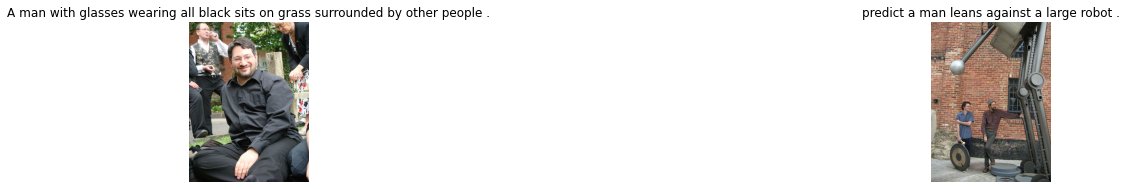

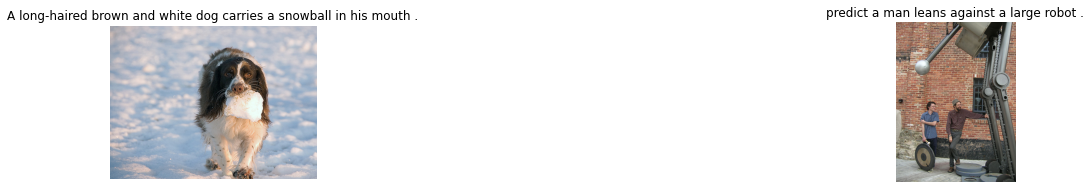

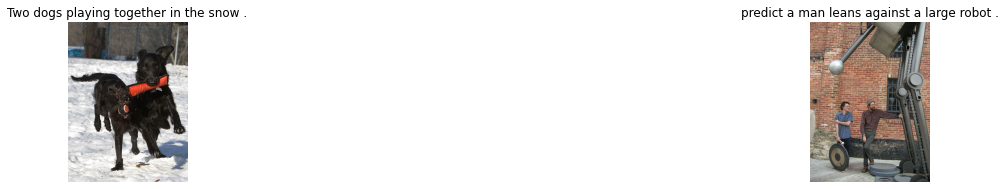

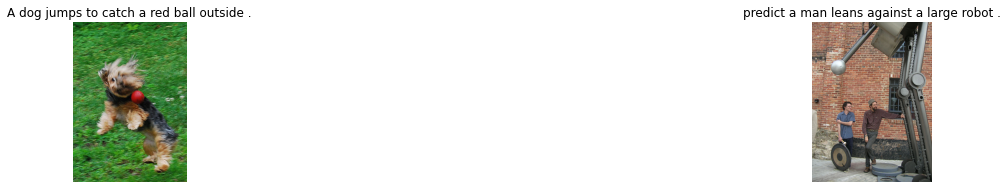

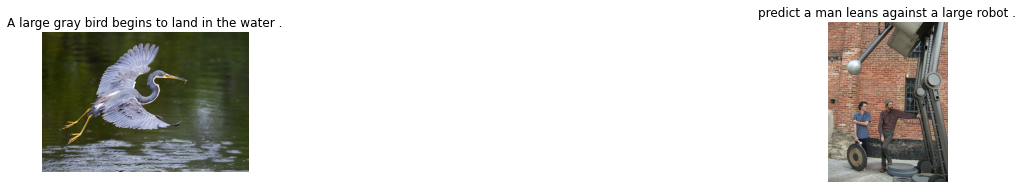

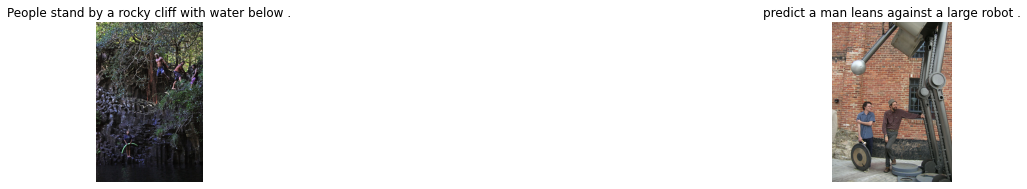

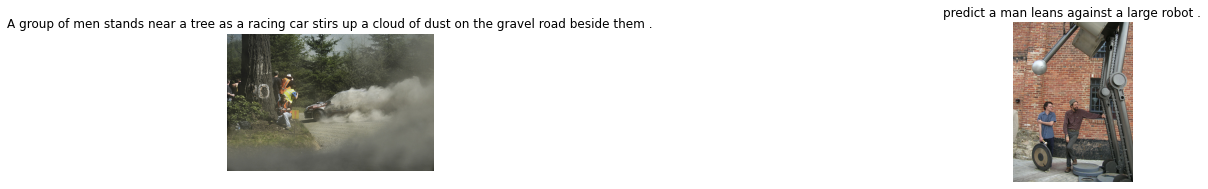

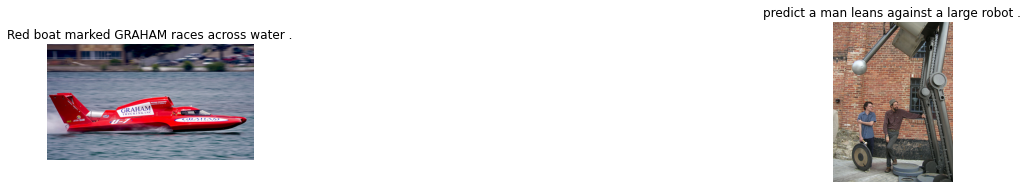

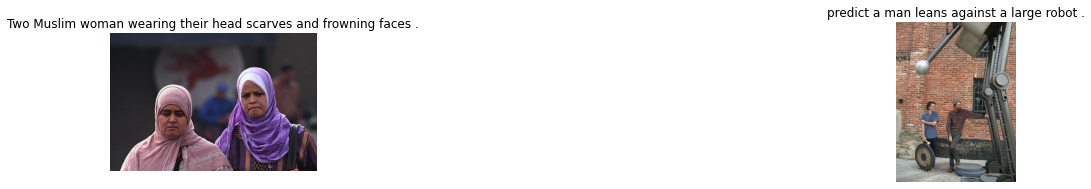

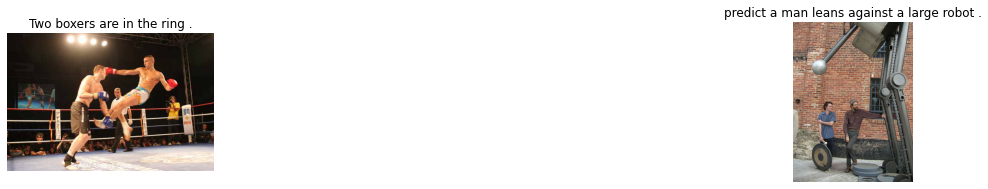

In [33]:
for item in list_for_test:
    tp = 1 #позиция оригинала
    pp = 4 #позиция предсказания
    
    img_query_text, img_name = test_get_predict(df_tt, item, model3)
    img_original = Image.open(f'source/test_images/{df_tt["image"][item]}')
    img_predict = Image.open(f'source/test_images/{img_name}')

    text_original = df_tt["query_text"][item]
    text_predict = img_query_text

    plt.figure(figsize=(17,17))
    plt.subplot(5,4,tp);

    plt.title(text_original)
    plt.axis ('off')
    plt.imshow(img_original)

    plt.subplot(5,4,pp)
    plt.title(f'predict {text_predict}')
    plt.axis ('off')
    plt.imshow(img_predict);
    tp *=5
    pp *=5

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Проект действительно напряжный, но большая часть пути пройдена! </font>

<font color='blue'>Что можно сделать лучше:</font>
<ul><font color='red'>1) Добавить загрузчик</font></ul>
<ul><font color='red'>2) Убрать полносвязные слои для векторизации</font></ul>
<ul><font color='red'>3) Добавить больше наблюдений (просмотров данных и размерностей) и выводов</font></ul>
<ul><font color='red'>4) Описать выбор метрики</font></ul>

<font color='blue'><b>Спасибо, жду твоих исправлений и комментариев!</b></font>

## 8. Выводы

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Исследовательский анализ данных выполнен
- [ ]  Проверены экспертные оценки и краудсорсинговые оценки
- [ ]  Из датасета исключены те объекты, которые выходят за рамки юридических ограничений
- [ ]  Изображения векторизованы
- [ ]  Текстовые запросы векторизованы
- [ ]  Данные корректно разбиты на тренировочную и тестовую выборки
- [ ]  Предложена метрика качества работы модели
- [ ]  Предложена модель схожести изображений и текстового запроса
- [ ]  Модель обучена
- [ ]  По итогам обучения модели сделаны выводы
- [ ]  Проведено тестирование работы модели
- [ ]  По итогам тестирования визуально сравнили качество поиска